In [1]:

# Data source: https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website/data

# Linear Mulitple Models 

# This project contains: EDA with Dataset, Train Linear Regression Model, Evaluation Model Performance

# Dataset contains information about customer who buys clothes online.
# Questions to Answer: Can we predcit how much a customer is going to spend per year on online clothings?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from function_file import clean_names
# Python version 3.12.3

C:\Users\K\AppData\Local\Temp\ipykernel_9224\235462537.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv(r"data_in\Ecommerce Customers.csv").rename(columns = clean_names)
df.head()

,email,address,avatar,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

# 500 Entries

# %---Planned Independent Variable---%
# session length - How long (mins) spend on each essison
# Time on App - How long (mins) user spend on Phone Application before placing purchase order
# Length of Memebership - How long (years) users has been a memeber of the shop

# %---Dependent Variable---%
# Yearly Amount Spend - User Spending per year ($)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   email                 500 non-null    object 
 1   address               500 non-null    object 
 2   avatar                500 non-null    object 
 3   avg_session_length    500 non-null    float64
 4   time_on_app           500 non-null    float64
 5   time_on_website       500 non-null    float64
 6   length_of_membership  500 non-null    float64
 7   yearly_amount_spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# Keep Potential columns
df = df[["yearly_amount_spent","avg_session_length","time_on_app", "time_on_website", "length_of_membership"]]

In [6]:
# Coorelation Matrix & Feature Selections
df.corr()
#Based on the correlation matrix, `length_of_membership > time_on_app > avg_session_length` that are positively correlated with the dependent variable.

,yearly_amount_spent,avg_session_length,time_on_app,time_on_website,length_of_membership
yearly_amount_spent,1.000000,0.355088,0.499328,-0.002641,0.809084
avg_session_length,0.355088,1.000000,-0.027826,-0.034987,0.060247
time_on_app,0.499328,-0.027826,1.000000,0.082388,0.029143
time_on_website,-0.002641,-0.034987,0.082388,1.000000,-0.047582
length_of_membership,0.809084,0.060247,0.029143,-0.047582,1.000000


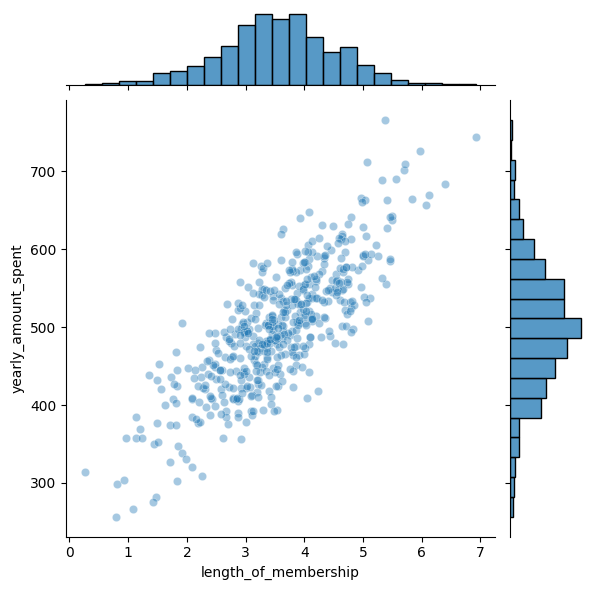

In [7]:
# Spending vs time on website - No particular correlation 
sns.jointplot(x = "length_of_membership", y = "yearly_amount_spent", data = df, alpha = 0.4)

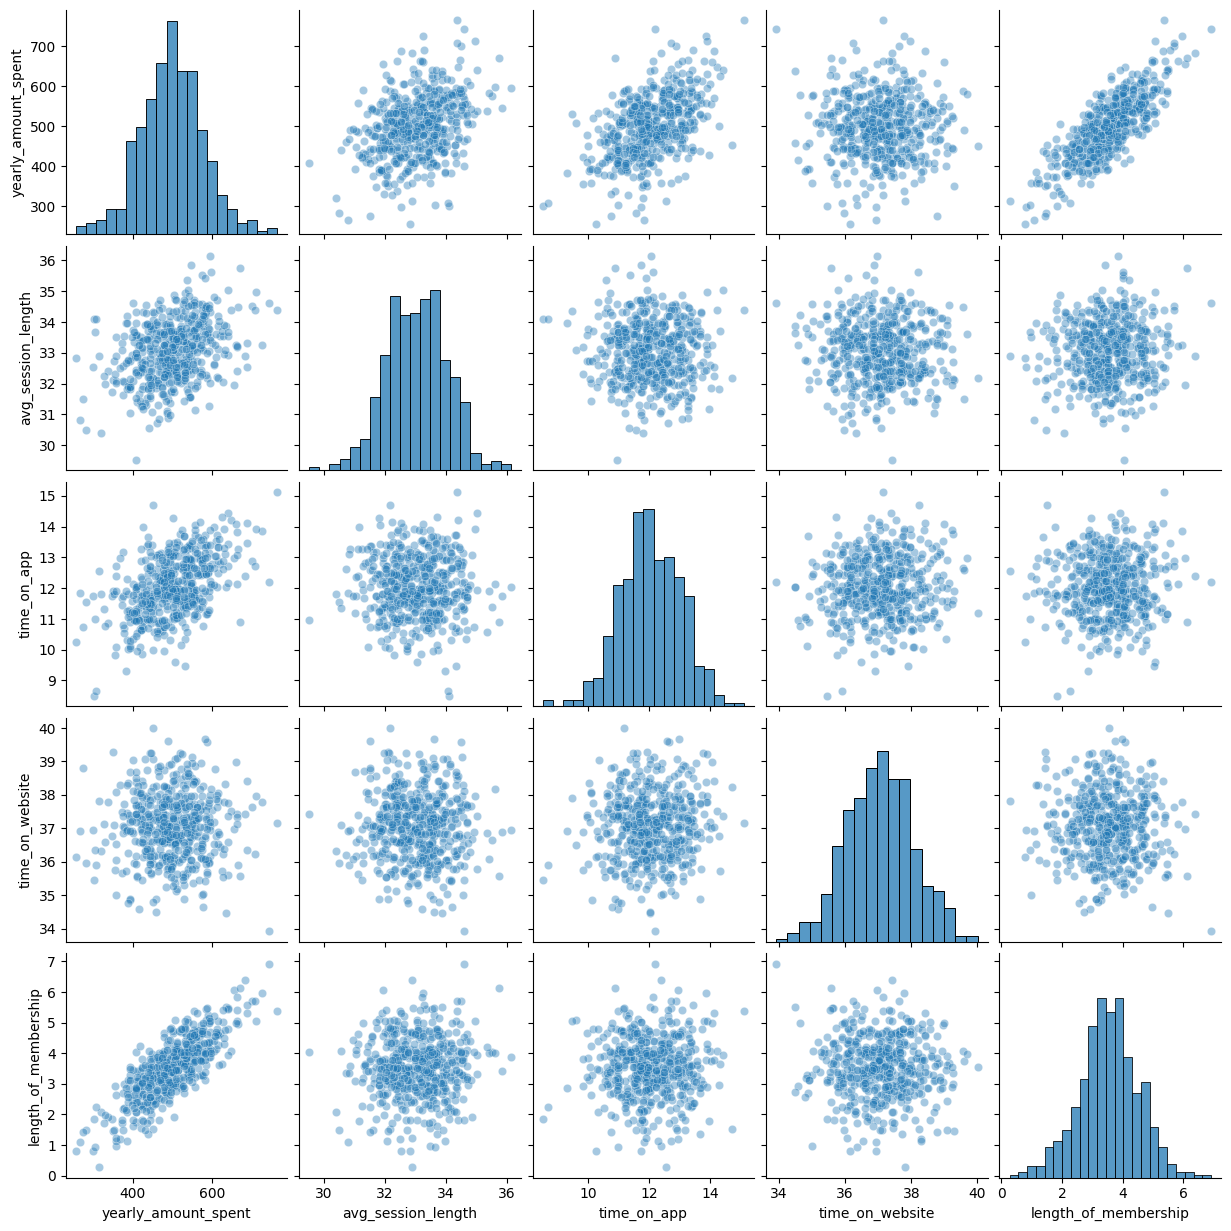

In [8]:
# Correlation plot between float variables
sns.pairplot(df, kind = 'scatter', plot_kws={'alpha':0.4})

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare LR Model
lr = LinearRegression()

# Features to test:length_of_membership, time_on_app
X = df[["length_of_membership", "time_on_app", "avg_session_length", "time_on_website"]]
y = df["yearly_amount_spent"]

#%--- Begin Split Test/Train Datasets ---%
# Keep 30% of testing data for test dataset (0.3)
# Keep a constrain to "random_state" to 42

# Split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [10]:
# Training the LR model

#Given Predictors (X), return Y
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
cdf = pd.DataFrame(lr.coef_, X.columns, columns = ["Coef"])
cdf

,Coef
length_of_membership,61.674732
time_on_app,38.597135
avg_session_length,25.724256
time_on_website,0.459148


In [12]:
# Generate Predictions 
# Using Test dataset & Trained Model to generate prediction
predictions = lr.predict(X_test)

In [13]:
predictions.reset_index(names = "value")

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

Text(0, 0.5, 'actual')

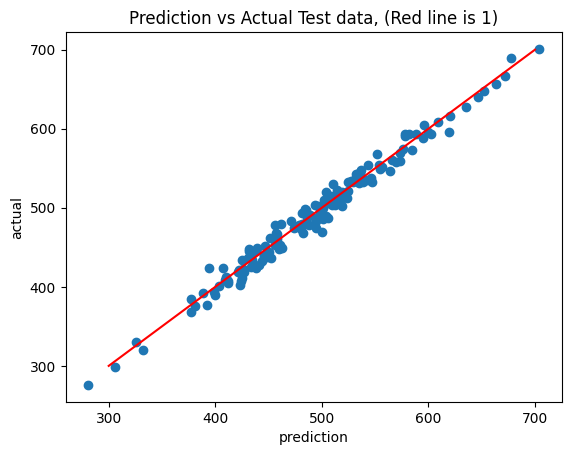

In [39]:
# Scatter Plot between x (length_of_membership) vs y (yearly_amount_spent)

plt.scatter(predictions,y_test)
plt.plot([300, 700],[300, 700], color = "red")
plt.title('Prediction vs Actual Test data, (Red line is 1)')
plt.xlabel("prediction")
plt.ylabel("actual")

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [43]:
# Model Evaluation

print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

# Note
# Mean Abs Error is the measurment of accuracy for continous variables, without considering their direction. 
# RMSE is measurement of the average magnitude of error. It is more unforgiven penalty metric.

# RMSE is always large or equal to MAE.
# If RMSE = MAE then all the errors are the same magnitude.



Mean Absolute Error:  8.426091641432073
Mean AbsolSqaured Error:  103.91554136503284
RMSE:  10.19389726086313


In [ ]:
# Mean Abs Error, there is an uncertainty between predicted outcome vs real data is $8.00.
# Root Mean sqrt Error, and magnitudual error for penalty scale. $10.19.

# In this case, in the original dataset we have an mean spending of $500.00,
# using RMSE ($10.19) the model is generating ~2% of error


In [50]:
# Residuals

# For linear model (i.e. LR), an assumption was made that all the residuals are normally disturbuted.
# The resisudals / model predition and the actuall value are random by nature.
# If it is not random, we will introduct bias into the model.
# If it is normal distbuted, that means the error is coming from the statitstics error from prediction.
residuals = y_test - predictions

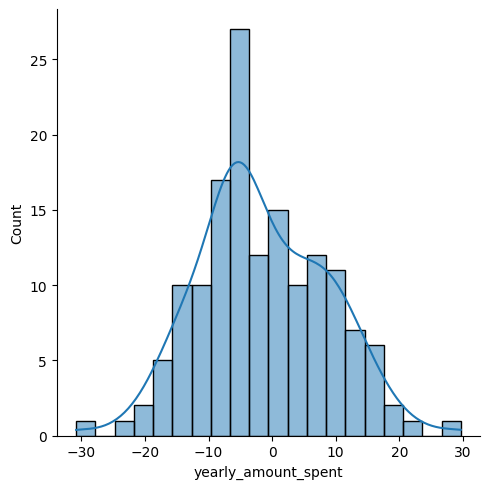

In [55]:
sns.displot(residuals, bins = 20, kde = True)

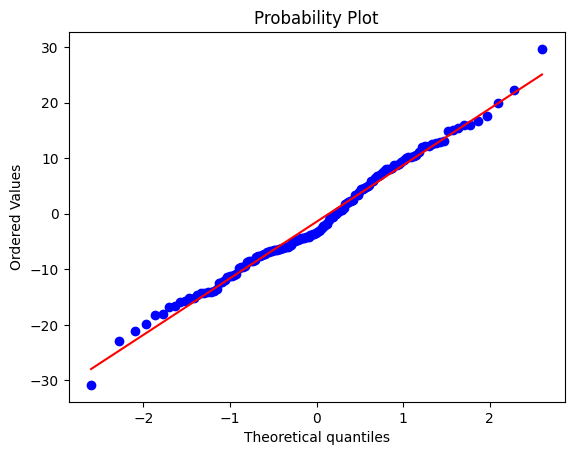

In [60]:
import pylab
import scipy.stats as stats

# Q-Q Plot (Quantile - Quantile Plot)
# Residuals seems to follow the normality line
stats.probplot(residuals, dist = "norm", plot=pylab)
pylab.show()